In [14]:
import os
import pandas as pd
from datetime import datetime
pd.set_option('display.float_format', '{:.5f}'.format)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [15]:
os.listdir()

['.ipynb_checkpoints',
 '.virtual_documents',
 'av_calibrated call 2012_01_03_2024_07_18.csv',
 'av_calibrated put 2012_01_03_2024_07_18.csv',
 'av_calibrated puts 2020-01-01_2024-10-08.csv',
 'historical_av_calibration_testing.ipynb']

In [16]:
df = pd.read_csv(os.listdir()[2])
df = df.iloc[:,1:].copy()

In [17]:
df.describe()

,spot_price,theta,rho,kappa,eta,v0,relative_error
count,1058.00000,1058.00000,1058.00000,1058.00000,1058.00000,1058.00000,1058.00000
mean,357.58962,1.84106,-0.68244,13805.26591,1913.38011,18.41686,271957453.55001
std,91.73987,10.46506,0.25263,147356.48828,17762.86037,197.21329,8833325419.04139
min,127.26000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.01178
25%,291.07500,0.02051,-0.76799,1.29319,0.57759,0.01131,0.03988
50%,367.63247,0.04971,-0.72429,3.92815,1.62889,0.03316,0.06262
75%,426.28286,0.08598,-0.65847,11.31792,2.81953,0.07088,0.18311
max,562.23355,142.21543,0.99999,3952659.95068,361657.79141,4608.83512,287320949669.78870


In [18]:
df['calculation_date'] = pd.to_datetime(df['calculation_date'],format="%Y-%m-%d")
df.dtypes

spot_price                 float64
calculation_date    datetime64[ns]
theta                      float64
rho                        float64
kappa                      float64
eta                        float64
v0                         float64
relative_error             float64
w                           object
dtype: object

In [19]:
df = df[df['calculation_date']>=datetime(2018,1,1)]
original_count = df.shape[0]

In [20]:
df = df[df['rho']<0]
print(f"total days lost: {original_count - df.shape[0]} out of {original_count}")

total days lost: 21 out of 999


In [21]:
big = df[((df['relative_error']>=0.2)&(df['relative_error']<1))]
aberrations = df[df['relative_error']>1]
df = df[~df.index.isin(big.index) & ~df.index.isin(aberrations.index)]

In [22]:
print(f"total days lost: {original_count - df.shape[0]} out of {original_count}")

total days lost: 235 out of 999


In [23]:
df.describe()

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error
count,764.00000,764,764.00000,764.00000,764.00000,764.00000,764.00000,764.00000
mean,371.12439,2021-02-18 15:19:47.434554880,1.98044,-0.71839,18040.51340,2340.63152,20.47005,0.05954
min,223.97000,2018-01-02 00:00:00,0.00164,-1.00000,0.00000,0.10347,0.00000,0.01230
25%,298.18375,2019-12-20 00:00:00,0.02668,-0.77270,2.48184,1.40241,0.02451,0.03555
50%,374.21625,2021-05-26 00:00:00,0.05887,-0.72630,5.45129,1.98637,0.04715,0.05192
75%,432.85139,2022-04-15 00:00:00,0.09362,-0.66340,15.49269,3.65063,0.09135,0.07098
max,562.23355,2024-07-18 00:00:00,142.21543,-0.28357,3952659.95068,361657.79141,4608.83512,0.19951
std,73.84528,NaN,11.38224,0.09488,171258.69855,19538.44126,194.97782,0.03451


In [24]:
df['w'].unique().tolist()

['call']

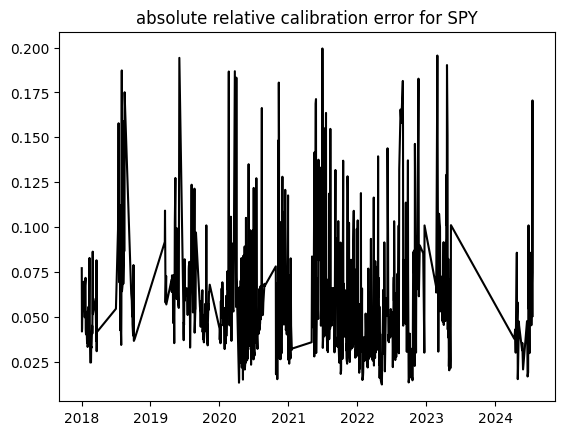

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df.set_index('calculation_date')['relative_error'],color='black')
plt.title('absolute relative calibration error for SPY')
plt.show()
plt.clf()

In [13]:
pd.set_option("display.max_rows",None)
big.sort_values(by='relative_error',ascending=False).reset_index(drop=True)

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error,w
0,260.00000,2020-03-13,0.21870,-1.00000,3.13820,0.46386,0.03859,0.99748,call
1,278.33500,2020-04-09,0.18222,-1.00000,2.38923,0.44933,0.02566,0.95389,call
2,412.60500,2022-08-26,46.70826,-0.72140,0.00073,0.39416,0.03941,0.94541,call
3,294.72000,2019-06-20,0.00000,-0.49066,0.36040,0.15124,0.00841,0.92761,call
4,290.49500,2018-08-30,0.01952,-0.74847,0.00000,0.49923,0.00999,0.90388,call
5,278.92500,2019-05-30,84.79706,-0.68000,0.00007,0.15692,0.01693,0.87009,call
6,289.91000,2018-08-28,0.01793,-0.74151,0.00000,0.49505,0.00993,0.86484,call
7,286.18500,2018-08-23,24.70422,-0.49227,0.00068,0.33126,0.00842,0.85968,call
8,282.82500,2018-07-25,0.01971,-0.74888,0.00000,0.49938,0.00999,0.85085,call
9,289.94500,2018-09-17,0.01794,-0.74059,0.00000,0.49446,0.00992,0.83544,call


In [14]:
pd.set_option("display.max_rows",None)
aberrations.sort_values(by='relative_error',ascending=False).reset_index(drop=True)

,spot_price,calculation_date,theta,rho,kappa,eta,v0,relative_error,w
0,286.51000,2018-08-21,0.00152,-0.24694,58.95375,0.00160,0.00753,287320949669.78870,call
1,304.53500,2020-02-27,0.02553,-0.99993,1.09433,0.38380,0.05190,3933783.22550,call
2,320.18500,2020-07-16,0.00000,-0.72500,0.45254,0.49211,0.00962,79445.35886,call
3,324.35500,2020-07-23,0.00000,-0.73664,0.59542,0.49580,0.00981,59845.08991,call
4,377.44000,2022-07-05,0.00000,-0.73916,0.68627,0.49649,0.00986,34267.94065,call
5,320.30500,2020-06-10,0.00000,-0.73006,0.45005,0.49398,0.00968,22654.99621,call
6,377.75000,2022-07-01,0.00000,-0.73721,0.69009,0.49583,0.00983,15108.51924,call
7,437.44000,2021-10-11,0.00000,-0.73757,0.56656,0.49614,0.00982,14823.01668,call
8,414.14750,2021-05-20,0.00000,-0.73922,0.49779,0.49676,0.00983,14489.35258,call
9,368.41860,2020-12-23,0.00027,-0.01395,0.13817,0.33995,0.00569,11869.69931,call


In [15]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")